### k-means clustering

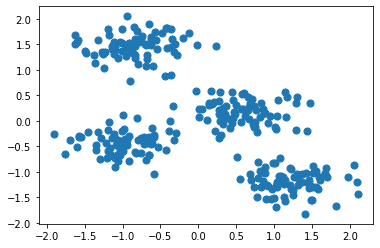

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


plt.scatter(X[:, 0], X[:, 1], s=50)

### Making a k-means model

In [2]:
from sklearn.cluster import KMeans

# KMeans will run "n_init" times and it will give the best result based on inertia
model = KMeans(n_clusters=4, n_init = 10)

### We can look at how the data points are labeled

In [3]:
labels = model.fit_predict(X)
labels

array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
       1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2], d

### How many unique labels are there?

In [4]:
np.unique(labels)  ## how many clusters, 4 clusters

array([0, 1, 2, 3], dtype=int32)

### We can look at the cluster centers.

In [5]:
centroids = model.cluster_centers_
centroids

array([[ 1.21774671, -1.19712077],
       [-0.83691948,  1.46193015],
       [-0.96619422, -0.43906093],
       [ 0.58536699,  0.17425154]])

### Let's visualize the results by plotting the data colored by the labels. We will also plot the cluster centers.

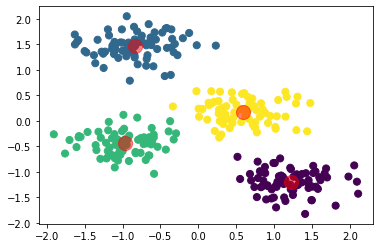

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5);

### What is the inertia for this model?

In [7]:
model.inertia_

56.02477057509949

### Can we evaluate the performance of the clustering since we have the "ground truth" in this example?

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y, labels)

0.25

B/c we have the ground truth y, we can evaluate

### Q: Wait, what? Why do we have such a low accuracy?

### What happens when we provide a sub-optimal number of clusters?

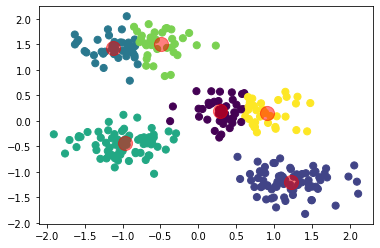

In [9]:
## we provide number of clusters 
n_clusters = 6

model = KMeans(n_clusters = n_clusters)
model.fit(X)
labels = model.predict(X)
centers = model.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### What is the inertia for this model and how does this compare when we use n_clusters = 4?

In [10]:
model.inertia_

41.84688425387599

Inertia here is smaller w/ n cluster of 6. This means that we're over fitting

### Let's check out how inertia varies as a function of n_cluster.

In [13]:
## varying amount of clusters from 2 to 10. Diff k numbers for 2 to 10
kmeans_k = [KMeans(n_clusters=k, random_state=0).fit(X) for k in range(2, 11)]
inertias = [model.inertia_ for model in kmeans_k] ## record inertia of each model

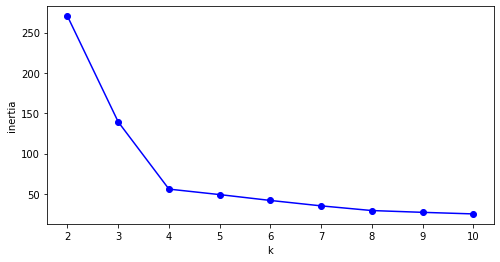

In [12]:
plt.figure(figsize=(8, 4))

plt.plot(range(2, 11), inertias, "bo-")
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

As k varies, inertia decreases as a function of k. The elbow might be optimal k value

### n_cluster = 4 seems to be the elbow (or knee) in this example, but remember that inertia always decreases as we add more clusters and it may not necessarily a good metric to find the optimal n_cluster.

### An alternative is the silhouette score.

In [15]:
## can use sihoutte score, generate a kmeans model w/ 4 clusters, run s score w/ initial data and label that kmeans generated
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters = 4)
model.fit(X)
silhouette_score(X, model.labels_)

0.6569234398199433

### How does the silhouette score vary as a function of n_clusters?

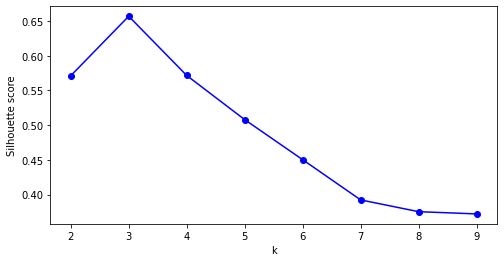

In [16]:
## vary number of clusters, see how s score changes
kmeans_k = [KMeans(n_clusters=k, random_state=0).fit(X) for k in range(2, 11)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_k[1:]]

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.show()

3 clusters optimal based on s score. We can see actual data and see if this is true or not

### Silhouette diagram (don't worry about memorizing the script below)

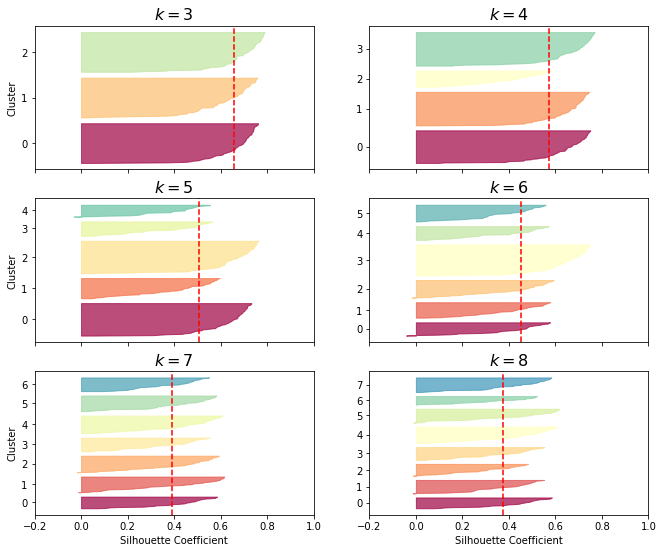

In [17]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6, 7, 8):
    plt.subplot(3, 2, k - 2)
    
    y_pred = kmeans_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5, 7):
        plt.ylabel("Cluster")
    
    if k in (7, 8):
        plt.gca().set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    plt.xlim(-0.2,1)
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()


### Can we fix some of the cluster centers?

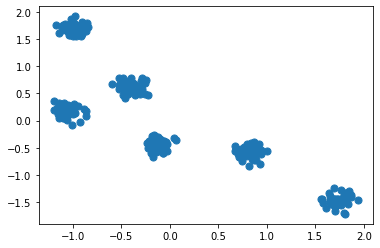

In [49]:
## example data where we make 6 clusters
X, y = make_blobs(n_samples=300, centers=6, cluster_std=0.3, random_state=0)
X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], s=50)

### I will manually choose 4 cluster centers and randomly pick 2 other cluster centers.

In [50]:
## manually choose 4 centers by giving coordinates. Then randomly choose two data points for cluster centers
import random

n_clusters = 6

# Manually-chosen cluster centers
good_init = [[-1,0.25],[-0.4,0.6],[0.8,-0.6],[1.7,-1.5]]

# Adding two randomly-chosen cluster centers
good_init.append(list(X[random.randint(0,len(X)-1)]))
good_init.append(list(X[random.randint(0,len(X)-1)]))
good_init = np.array(good_init)

### Let's check out the initial cluster centers.

In [51]:
good_init

array([[-1.        ,  0.25      ],
       [-0.4       ,  0.6       ],
       [ 0.8       , -0.6       ],
       [ 1.7       , -1.5       ],
       [-0.22276774,  0.4726012 ],
       [-0.494415  ,  0.68153109]])

### We can also visualize the initial cluster centers.

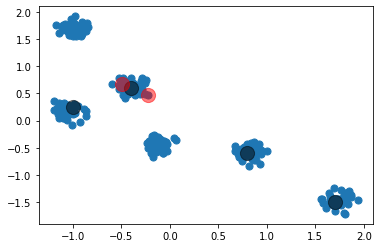

In [52]:
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.scatter(np.array(good_init)[:4, 0], np.array(good_init)[:4, 1], c='black', s=200, alpha=0.5)
plt.scatter(np.array(good_init)[4:, 0], np.array(good_init)[4:, 1], c='red', s=200, alpha=0.5)

Dark blue ones are what we choose. The red are what was randomly chosen

### Let's train k-means and see how the cluster centers moved.

/home/odonnells/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


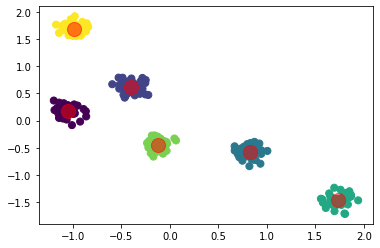

In [53]:
from sklearn.cluster import KMeans

# Note: When we give initial cluster centers, k-means will perform only one realization.
model = KMeans(n_clusters = n_clusters, init = good_init)
model.fit(X)
labels = model.predict(X)

centers = model.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### Let's compare initial and final cluster centers.

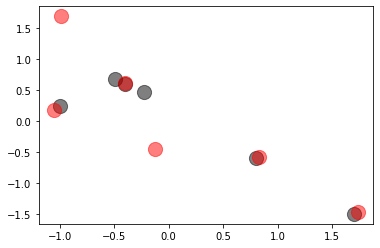

In [54]:
plt.scatter(good_init[:, 0], good_init[:, 1], c='black', s=200, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Inital cluster centers are black. The centers we gave manually moved. There is no way to fix the centers w kmeans b/c they correct over itterations

Depending on data set, answer can be sensitive to initial cluster center 

### As you can see, cluster centers can still move around and giving initial cluster centers does not guarantee that they will stay at the same location. 

If we really "fix" some cluster centers, we will have to edit the source code (which actually shouldn't be too hard).
Alternatively, we can try to give different weights when fitting the model but exactly how we weigh the data can be subtle/subjective. See an example here though: https://medium.com/@dey.mallika/unsupervised-learning-with-weighted-k-means-3828b708d75d

### k-means on MNIST data.

In [55]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

# Scale the grey-scale values to be between 0 and 1 instead of 0 and 255 for better numeric stability.
X /= 255. ## normalize by dividing all by 255 so all is now b/t 0 and 1

X.shape

(70000, 784)

### TODO: We know that there have to be 10 clusters. Let's train k-means using n_clusters=10.

In [58]:
import time 

tstart = time.time()

model = KMeans(n_clusters=10, random_state=0, n_init = 10, n_jobs=2)
clusters = model.fit_predict(X)

print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

/home/odonnells/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Elapsed Time: 76.43s


### Let's check the size of cluster centers.

In [59]:
model.cluster_centers_.shape

(10, 784)

### Let's check what the cluster centers look like.

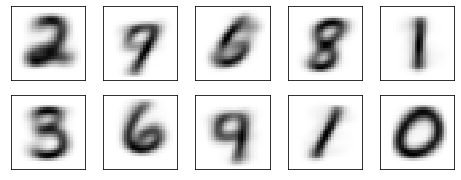

In [60]:
centers = model.cluster_centers_.reshape(10, 28, 28)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))

for ax, center in zip(ax.flat, centers):
    ax.set(xticks=[], yticks=[])
    ax.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Q: What do you see and how would you interpret the result?

2, 7 or 9, 6, 8, 1 3, 6, 9, 1, 0

We have a high dimensional space (784) where numbers are and defined by pixle intensity. If you have 1, likely
the points live  in the same location in the space w/ some broad distribution
Cluster center gives average distribution of all the points. Some blurry b/c maybe 6 and 5 are averaged together 
7 and 9 live in close space in the high dimensional space so average combines some 


### TODO: Apply PCA using 95 % of the total variance and train k-means. Compare the computing time.

In [61]:
from sklearn.decomposition import PCA

tstart = time.time()

pca = PCA(n_components=0.95) ## PCA choosing 95% of data

X_pca = pca.fit_transform(X) ## fit and transform scaled data

print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

Elapsed Time: 10.30s


### What is the size of the cluster centers after PCA?

In [62]:
model.cluster_centers_.shape

(10, 784)

### TODO: Inverse transform the cluster centers and plot them.

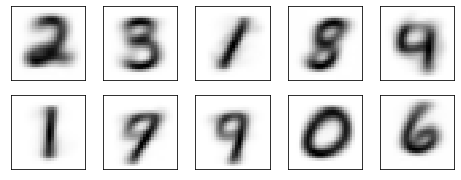

In [150]:
X_inverse = pca.inverse_transform(X_pca)

centers = X_inverse

fig, ax = plt.subplots(2, 5, figsize=(8, 3))

for ax, center in zip(ax.flat, centers):
    ax.set(xticks=[], yticks=[])
    ax.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### DBSCAN

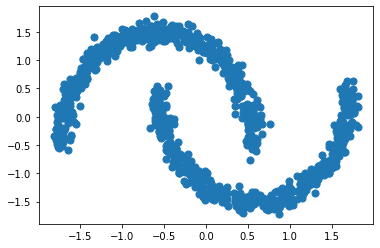

In [63]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=0)
X = StandardScaler().fit_transform(X) ## scaling

plt.scatter(X[:, 0], X[:, 1], s=50)

### Let's first check out k-means on this data.

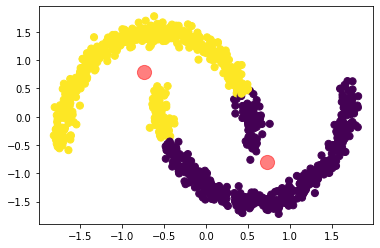

In [64]:
# k means. we know there are 2 clusters
n_clusters = 2

model = KMeans(n_clusters = n_clusters)
model.fit(X)
labels = model.predict(X)

centers = model.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);


The k means data made hyperspheres w/ cluster centers which misclassified points. 
Doesn't think about density, pattern, or anything but distance

### Let's try with the default hyperparameter values (eps=0.5, min_samples=5)

In [65]:
from sklearn.cluster import DBSCAN

model = DBSCAN()
model.fit(X)

DBSCAN()

### This is to make DBSCAN plots -- again, don't worry about memorizing the script.

In [66]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100, alpha=0.5)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

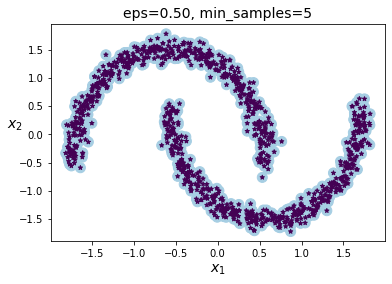

In [67]:
plot_dbscan(model, X, size=100)


### Q: What do you see? What does this mean, and how should we proceed?

Used epsilon 0.5 min samples of 5. There is only one cluster so we need to decrease epsilon b/c rn everything is one cluster. epsilon is radius of hypersphere you'll draw. rn it is 0.5 and that includes both


### A: We should probably reduce epsilon.

### Let's try eps=0.05.

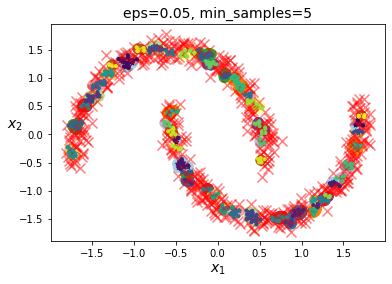

In [68]:
model = DBSCAN(eps=0.05)
model.fit(X)

plot_dbscan(model, X, size=100)

Red crosses is noise. See lots of colors, way too many clusters. Epsilon/ radius of hypersphere is too small

### We probably went down too much. There are so many clusters (and noise). Let's try eps=0.1.

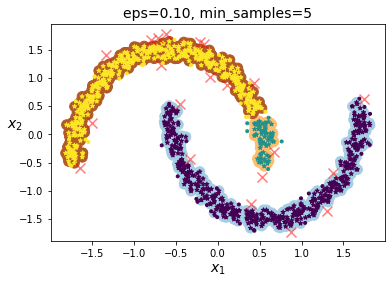

In [69]:
model = DBSCAN(eps=0.1)
model.fit(X)

plot_dbscan(model, X, size=100)

Three clusters here. Is slightly better but not te best. More clusters than should be so increase epsilon

### Okay, it looks much better, but we may want to increase epsilon a little bit more. Let's try eps=0.15.

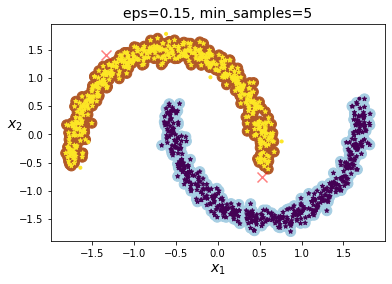

In [70]:
model = DBSCAN(eps=0.15)
model.fit(X)

plot_dbscan(model, X, size=100)

Good! Trial and error

### Perfect! But is there a better way to do the optimization?

### We can try to compute the distance to the k nearest neighbors and determine epsilon from it.

In [71]:
## try and compute distance to k nearest neighbors
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5) ## gave 5 neighbors
neighbors = nn.fit(X)
distances, indices = neighbors.kneighbors(X)

In [72]:
distances ## distance and index of neighbors. Starts w data point its self, 0 and then next neighbor
## fifth column shows the fifth closest neighbor

array([[0.        , 0.05601663, 0.09694564, 0.10231104, 0.12350095],
       [0.        , 0.02990693, 0.04719617, 0.04918573, 0.05410785],
       [0.        , 0.02587813, 0.08486852, 0.10263596, 0.11641225],
       ...,
       [0.        , 0.01064461, 0.04981285, 0.05625014, 0.06576485],
       [0.        , 0.02195811, 0.03195652, 0.0347297 , 0.05226182],
       [0.        , 0.01994161, 0.0438595 , 0.05826747, 0.05948166]])

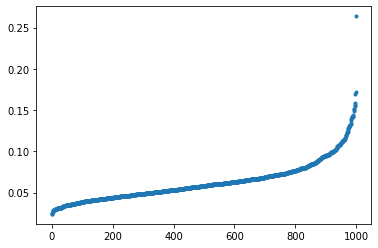

In [73]:
distances = distances[:,-1] ## we take the 5th neighbor b/c thats the size of hypersphere we want
distances = np.sort(distances, axis=0)
plt.plot(distances, '.')

starts from .02 to .25. At beginning data points are pretty packed, close to eachoter. RHS tail end of dots tells us they're a bit more sparcs/ less packed. If we choose something b/t .1 and .15 we can sepparate the big clusters 

### Going back to the best DBSCAN model.

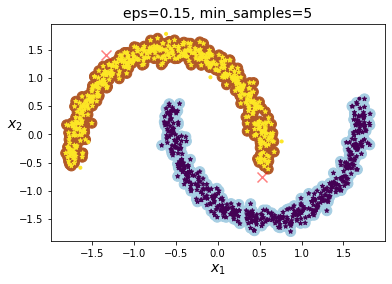

In [75]:
model = DBSCAN(eps=0.15, min_samples=5)
model.fit(X)

plot_dbscan(model, X, size=100)

### How many labels are there?

In [78]:
np.unique(model.labels_) ## here -1 is for noise, and two clusters 0 and 1

array([-1,  0,  1])

### How many data points are there in each clusters (or noise)?

In [77]:
np.bincount(model.labels_+1) ## how many data points in clusters / noise. Takes only positive numbers so added +1
## can also do model.labels = -1 to see 

array([  2, 500, 498])

2 points of noise, 500 in one cluster, 498 in the other

### How many core samples are there?

In [79]:
len(model.components_) 

992

In [80]:
model.components_ ## coordinates of core samples

array([[ 1.75081891,  0.48393978],
       [ 1.35606443, -0.90706929],
       [-0.90150442,  1.22470664],
       ...,
       [-0.202053  , -1.16108557],
       [-0.46412461, -0.2633107 ],
       [ 0.08084456, -1.39612327]])

### Q: How many non-core samples that is included in clusters are there?

Total 1000 data points. 992 are core samples, 2 outliers, so 6 non core samples

### DBSCAN on MNIST data

In [81]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

# We want to use only a small part of the entire data set because we will have to find optimal eps and min_samples.
X = X[::10] ## only 10% of data

# Scale the grey-scale values to be between 0 and 1 instead of 0 and 255 for better numeric stability.
X = X / 255.

X.shape

(7000, 784)

### TODO: Apply PCA using 95 % of the total variance and train k-means.

In [87]:
pca = PCA(n_components=0.95) ## PCA choosing 95% of data
X_pca = pca.fit_transform(X) ## fit and transform scaled data
X_pca.shape

(7000, 152)

### TODO: Optimize hyperparameters.

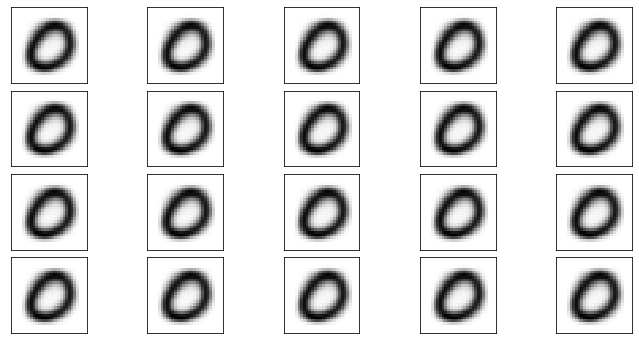

In [86]:
X_inverse = pca.inverse_transform(X_pca)

fig, axes = plt.subplots(4, 5, figsize=(12, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax, in enumerate(axes.ravel()):
    ax.set(xticks=[], yticks=[])
    ax.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Q: What eps and n_clusters did you end up with?

### TODO: Make plots showing averaged images for each cluster.

/scratch/local/10859773/ipykernel_58997/1049723802.py:6: RuntimeWarning: Mean of empty slice.
  ax.imshow(X_inverse[labels==i-1].mean(0).reshape(28,28), vmin=0, vmax=1)


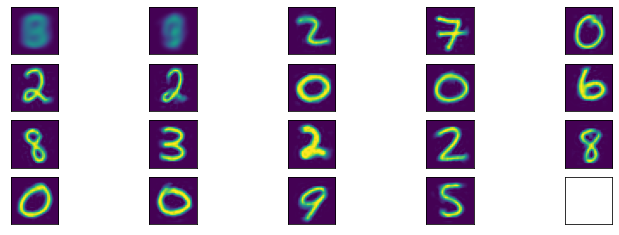

### Q: How does the images distribute over each cluster? Did you find anything noticeable?

### Q: What do you think about the performance of DBSCAN on the MNIST dataset compared with k-means? And what do you think made the difference?